In [1]:
import keras
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib notebook
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

Using TensorFlow backend.


In [3]:
# Get the data

df_ = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/ratings.csv')
#print(df_)
df = df_[['movieId','userId','rating','timestamp']]

#count how many tracks and Users we have

n_movies = len(df.movieId.unique())
n_users = len(df.userId.unique())
n_ratings=len(df.rating.unique())
print('n_movies:',n_movies,'/ n_users:',n_users,' / n_ratings:', n_ratings)

n_movies: 9724 / n_users: 610  / n_ratings: 10


In [4]:
df['rating'] = df['rating'].fillna(-1) #replace Nan by -1
print('remove',len(df[df['rating']==-1]),'rows / ',len(df))
df = df[df['rating']>-1] 

remove 0 rows /  100836


In [6]:
movieId = df.movieId.sort_values().unique()
print('last id for Movie',np.max(movieId))

userId = df.userId.sort_values().unique()
np.max(userId)
print('last id for User',np.max(userId))

last id for Movie 193609
last id for User 610


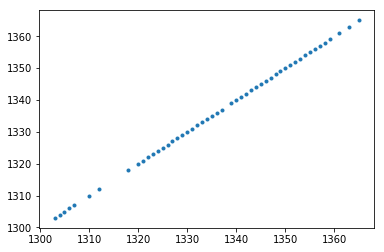

In [7]:
# Plot the repartition of the pks
lim = 50
start = 1000
plt.plot(movieId[start:start+lim],movieId[start:start+lim],'.')
plt.show()

In [8]:
#Movie
K = list(movieId) #what we have
V = list(range(0,len(movieId))) #objective
mapping = dict(zip(K, V)) #dictionary that link old id to new id
df['movieId'] = df['movieId'].apply(lambda x: mapping[x]) #apply this mapping to the column

In [9]:
#User
K_ = list(userId) #what we have
V_ = list(range(0,len(userId))) #objective
mapping_ = dict(zip(K_, V_)) #dictionary that link old id to new id
df['userId'] = df['userId'].apply(lambda x: mapping_[x]) #apply this mapping to the column

In [10]:

movieId = df.movieId.sort_values().unique()
print('last id for Movies',np.max(movieId))

userId = df.userId.sort_values().unique()
np.max(userId)
print('last id for Users',np.max(userId))


last id for Movies 9723
last id for Users 609


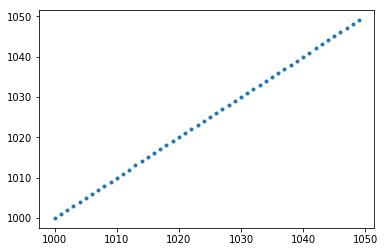

In [11]:
# Plot the repartition of the pks
lim = 50
start = 1000
plt.plot(movieId[start:start+lim],movieId[start:start+lim],'.')
plt.show()

In [12]:
#drop useless columns
df_keras = df[['movieId','userId','rating']]

#print(df_keras)
#train/test split
train, test = train_test_split(df_keras, test_size=0.2, random_state=1)

n_users = len(df.userId.unique())
n_movies = len(df.movieId.unique())

In [13]:
embedding_dimensions = 20

In [14]:
#1/ embed the movieId
movie_input = Input(shape=[1], name="Movie-Input") # the input is a scalar (the id)
movie_embedding = Embedding(n_movies+1, embedding_dimensions, name="Movie-Embedding")(movie_input) #embedd in low dimensions space
movie_vec = Flatten(name="Flatten-Movie")(movie_embedding) # make a vector of it

#2/ embed the userId
user_input = Input(shape=[1], name="User-Input") # the input is a scalar (the id)
user_embedding = Embedding(n_users+1, embedding_dimensions, name="User-Embedding")(user_input) #embedd in low dimensions space
user_vec = Flatten(name="Flatten-User")(user_embedding ) # make a vector of it

#3/ dot product between the two embeddings
output = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec ]) 


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#define model and compile
model = Model([user_input, movie_input], output)
#model.compile('adam', 'mean_squared_error')
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'acc'])

In [16]:
#history = model.fit([train.influencer__id, train.track__id], train.Groover_Score, epochs=20, validation_split=0.25, verbose=1)

history = model.fit([train.userId, train.movieId], train.rating, epochs=20, validation_split=0.25, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60501 samples, validate on 20167 samples
Epoch 1/20
60501/60501 [==============================] - 4s 73us/step - loss: 11.3966 - mean_absolute_error: 3.1764 - acc: 0.0097 - val_loss: 6.0813 - val_mean_absolute_error: 2.1634 - val_acc: 0.0593
Epoch 2/20
60501/60501 [==============================] - 4s 67us/step - loss: 3.5678 - mean_absolute_error: 1.5292 - acc: 0.1397 - val_loss: 2.5633 - val_mean_absolute_error: 1.2335 - val_acc: 0.1899
Epoch 3/20
60501/60501 [==============================] - 4s 67us/step - loss: 1.7918 - mean_absolute_error: 1.0205 - acc: 0.2338 - val_loss: 1.8489 - val_mean_absolute_error: 0.9998 - val_acc: 0.2439
Epoch 4/20
60501/60501 [==============================] - 4s 67us/step - loss: 1.2448 - mean_absolute_error: 0.8402 - acc: 0.2797 - val_loss: 1.5754 - val_mean_absolute_error: 0.9051 - val_acc: 0.2698
Epoch 5/20
60501/60501 [==============================] - 4s 67us/step - loss: 0.9947 - mean_abso

In [17]:
#save model
model.save('./EPITA_RECOMMENDATION_SYSTEM/Algorithms/regression_model.h5')

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


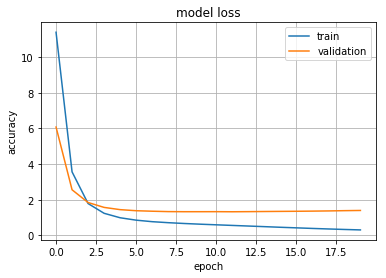

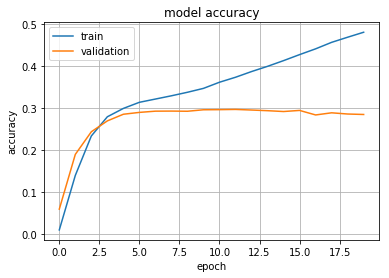

In [18]:
#LOSS PLOT
print(history.history.keys())
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

# summarize history for accuracy
plt.close()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()


In [19]:
# Extract embeddings
movie_em = model.get_layer('Movie-Embedding') #this is after the embedding layer
movie_em_weights = movie_em.get_weights()[0] 

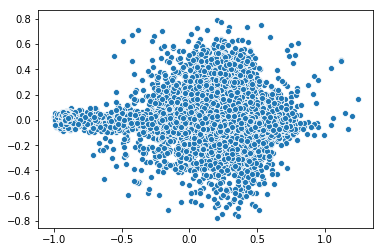

In [20]:
# PCA : plot track embeddings in 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(movie_em_weights)
plt.close()
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9725 samples in 0.012s...
[t-SNE] Computed neighbors for 9725 samples in 3.604s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9725
[t-SNE] Computed conditional probabilities for sample 2000 / 9725
[t-SNE] Computed conditional probabilities for sample 3000 / 9725
[t-SNE] Computed conditional probabilities for sample 4000 / 9725
[t-SNE] Computed conditional probabilities for sample 5000 / 9725
[t-SNE] Computed conditional probabilities for sample 6000 / 9725
[t-SNE] Computed conditional probabilities for sample 7000 / 9725
[t-SNE] Computed conditional probabilities for sample 8000 / 9725
[t-SNE] Computed conditional probabilities for sample 9000 / 9725
[t-SNE] Computed conditional probabilities for sample 9725 / 9725
[t-SNE] Mean sigma: 0.072024
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.991951
[t-SNE] KL divergence after 300 iterations: 3.292227


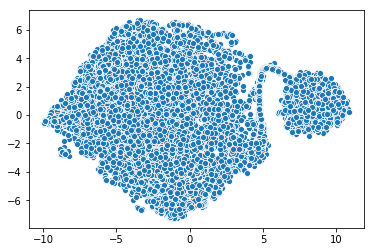

In [21]:
# TSNE : plot track embeddings in 2 dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(movie_em_weights)
plt.close()
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

In [22]:
# Extract embeddings
user_em = model.get_layer('User-Embedding') #this is after the embedding layer
user_em_weights = user_em.get_weights()[0] 

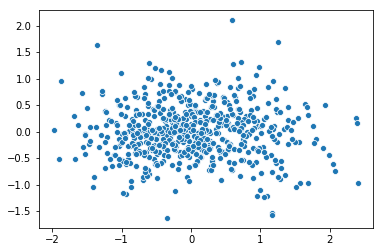

In [23]:
# PCA : plot track embeddings in 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_em_weights)
plt.close()
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 611 samples in 0.002s...
[t-SNE] Computed neighbors for 611 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 611 / 611
[t-SNE] Mean sigma: 0.500853
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.506378
[t-SNE] KL divergence after 300 iterations: 1.403092


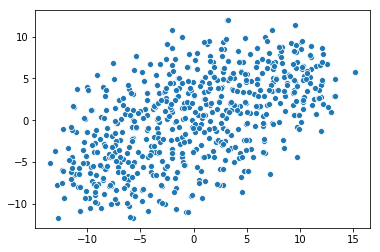

In [24]:
# TSNE : plot track embeddings in 2 dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(user_em_weights)
plt.close()
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

In [25]:
# Creating dataset for making recommendations for the first user
movie_data = np.array(list(set(df.movieId)))
user = np.array([1 for i in range(len(movie_data))])
predictions = model.predict([user, movie_data])
predictions = np.array([a[0] for a in predictions])
recommended_Movie_id = (-predictions).argsort()[:5]
print(recommended_Movie_id)
print(predictions[recommended_Movie_id])

[3500 8943 8498 5890 1301]
[5.9131246 5.8796334 5.739856  5.6597404 5.598531 ]


In [26]:
Movies = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/movies.csv')
Movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
print(Movies[Movies['movieId'].isin(recommended_Movie_id)])

      movieId                      title        genres
999      1301    Forbidden Planet (1956)  Drama|Sci-Fi
2615     3500  Mr. Saturday Night (1992)  Comedy|Drama
4110     5890              Elling (2001)  Comedy|Drama
5361     8943         Being Julia (2004)  Comedy|Drama


In [38]:

import pandas as pd
from surprise import SVD
from surprise import KNNBaseline
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

In [50]:
#movies = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/movies.csv')
#ratings = pd.read_csv('~/EPITA_RECOMMENDATION_SYSTEM/Algorithms/ratings.csv')
#df = pd.merge(movies, ratings, on='movieId', how='inner')
#df_keras = df[['movieId','userId','rating']]
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_keras[['userId', 'movieId', 'rating']], reader)


#print(df_keras)
#train/test split
#train, test = train_test_split(data, test_size=0.25, random_state=1)

trainSet, testSet = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(random_state=0)
algo.fit(train)
predictions = algo.test(test)

def MAE(predictions):
        return accuracy.mae(predictions, verbose=False)
def RMSE(predictions):
        return accuracy.rmse(predictions, verbose=False)
    
print("RMSE: ", RMSE(predictions))
print("MAE: ", MAE(predictions))


RMSE:  0.8741736428723487
MAE:  0.6708917015377369
